In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("exchange-rate-twi.csv")
data.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              304 non-null    int64  
 1   Exchange Rate TWI  304 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


In [8]:
data.shape

(304, 2)

In [10]:
data.isnull().sum()/data.shape[0]

Month                0.0
Exchange Rate TWI    0.0
dtype: float64

# Auto Regressive methods

## Stationarity vs non-stationary time series

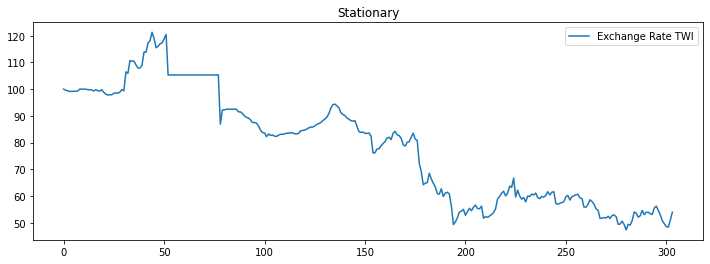

In [11]:
data['Exchange Rate TWI'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Stationary')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [12]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Exchange Rate TWI'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.805468
Critical Values @ 0.05: -2.87
p-value: 0.817511


In [13]:
adf_test

(-0.8054678720541549,
 0.8175106426685046,
 0,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1268.8696918056114)

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [15]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Exchange Rate TWI'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.725897
Critical Values @ 0.05: 0.46
p-value: 0.010000


c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
